**DICIONÁRIO DE VARIÁVEIS**

**1) Dados - Questão 1**

*df_vendedores* - Data Frame (Dados - Questão 1) contendo dados a respeito de cada vendedor e informações sobre suas vendas.

*df_vendedores_qtd* - Data Frame contendo informacoes sobre quantidade de vendas de cada vendedor, total de vendas de cada vendedor, percentual da quantidade de vendas em relação ao total e percentual do total de vendas por vendedor em relação a todos os vendedores.

**2) Dados - Questão 2**

*df_lojas* - Data Frame (Dados - Questão 2) contendo dados a respeito das lojas Unidade Manaus 1 e Unidade Manaus 3

# **1. IMPORTANDO BIBLIOTECAS**

As bibliotecas utilizadas para visualizar os dados serão:

**Matplotlib**: é uma biblioteca utilizada para plotar os mais variados tipos de gráficos.

**Seaborn**: utiliza o Matplotlib como base e fornece funções simples de usar para criação de gráficos que seriam complexos apenas com o Matplotlib.

*Instalação:* pip install numpy pandas matplotlib seaborn.

A linha logo abaixo faz os gráficos aparecerem no Jupyter notebook, não é necessária caso não esteja utilizando ele.

%matplotlib inline

In [1]:
#!pip install cufflinks
#!pip install plotly
#!pip install chart_studio
#!pip install xlsxwriter

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import shutil

# Outras bibliotecas interessantes
import cufflinks as cf
from plotly.offline import iplot

In [3]:
#Criar diretório imagens caso o código ainda não tenha sido rodado, caso já exista
#excluir e criar um novo diretório com diretórios dados1 e dados2 dentro
if not os.path.exists('imagens'): 
  os.makedirs('imagens/dados1')
  os.makedirs('imagens/dados2')
else:
  shutil.rmtree('imagens') 

if not os.path.exists('imagens'):
  os.makedirs('imagens/dados1')
  os.makedirs('imagens/dados2')


# **2. FUNÇÕES IMPORTANTES**

## GRÁFICO DE PIZZA

In [4]:
def grafico_pizza(df,ocorr,lab,x=2,explode=[],title='TITULO',diretorio='dados1'):
  fig = plt.figure(figsize=(8,7))
  ax1 = fig.add_subplot(111)
  ocorrencia = []
  labels = []
  for i in df.index: 
      if i > x:
        break
      else:
        ocorrencia.append(df[ocorr][i])
        labels.append(df[lab][i])
        

  if len(explode) == 0:
    for i in df.index:
      if i > x:
        break
      else:
        explode.append(i*0.05)
          

  cores = [ '#01a0e4','#d52d2b','#393ed3', 'yellow','black','gray','pink','brown']
  total = sum(ocorrencia)
  plt.pie(ocorrencia, explode=explode, labels=labels, colors=cores, autopct='%1.1f%%', shadow=True, startangle=90)

  # Com essa opção o gráfico ficará em círculo
  plt.axis('equal') 

  # Cria um título para o gráfico
  ax1.set_title(title, fontsize=15) 

  #legenda em posicao especifica
  ax1.legend(bbox_to_anchor=(1,0), loc="lower right", bbox_transform=fig.transFigure)
  
  #Fonte dos eixos
  plt.rcParams['xtick.labelsize'] = 16
  plt.rcParams['ytick.labelsize'] = 16
  #plt.rcParams['legend.fontsize'] = 16
  
  # Salvar grafico como imagem
  plt.savefig(f'imagens/{diretorio}/'+title +'.png')

  #Monstra o gráfico
  plt.show()

## GRÁFICO EM BARRAS

In [5]:
def grafico_barras_empilhadas(df, coluna1, coluna2, nome_dados, legenda=[1,2],nome_eixo_x='eixo x',nome_eixo_y='eixo y',title='titulo'):
  x1 = []
  x2 = []
  x3 = []
  a = []
  for i in df.index: 
      if i > 5:
        break
      else:
        #cria os dados
        x1.append(df[coluna1][i])
        x2.append(df[coluna2][i])
        x3.append(df[nome_dados][i])
        a.append(df[coluna1][i]/(df[coluna1][i] + df[coluna2][i]) )

  #Define a Largura das barras
  barWidth = 0.25
      
  #cria a figura e o eixo
  fig = plt.figure(figsize=(8,7))
  ax1 = fig.add_subplot(111)

  #Definindo a posição das barras
  r1 = np.arange(len(x1))
  r2 = [x + barWidth for x in r1]

  #Criando as barras
  plt.bar(r1, x1, color='#01a0e4', width=barWidth, label= legenda[0])
  plt.bar(r2, x2, color='#d52d2b', width=barWidth, label=legenda[1])


  # Adicionando legendas as barras
  plt.xlabel(nome_eixo_x, fontsize=15)
  plt.xticks([r + barWidth for r in range(len(x1))],x3)
  plt.ylabel(nome_eixo_y, fontsize=15)
  plt.title(title,fontsize=15)

  #legenda em posicao especifica
  ax1.legend(bbox_to_anchor=(1,0), loc="lower right", bbox_transform=fig.transFigure)

  #Fonte dos eixos
  plt.rcParams['xtick.labelsize'] = 16
  plt.rcParams['ytick.labelsize'] = 16
  #plt.rcParams['legend.fontsize'] = 16

  # cria o segundo eixo
  ax2 = ax1.twinx() 
  ax2.set_ylabel('Média', color='g', fontsize=15) #cria o rótula do segundo eixo
  ax2.plot(a, color='g')
  ax2.tick_params(axis='y', labelcolor='g')

  # Salvar grafico como imagem
  plt.savefig('imagens/dados1/'+title +'.png')

  plt.show()

## EXTRAIR VENDEDOR OU PRODUTO QUE MAIS VENDERAM/FORAM VENDIDOS POR FILIAL

In [6]:
def vp_filial(filiais, list_qtd_v_vendedores, col):
  todas_filiais_v = {}
  for filial in filiais:
    for linha in list_qtd_v_vendedores:
      if linha[0] == filial:
        if 'maior' in locals():
          if linha[col] > maior:
            maior = linha[col]
            vendedor = linha[2]
            cod_vendedor= linha[1]
        else:
          maior = linha[col]
          vendedor = linha[2]
          cod_vendedor= linha[1]
    todas_filiais_v[filial] = [maior,vendedor,cod_vendedor]
    maior = 0
  return todas_filiais_v

## HISTOGRAMA

In [7]:
def histograma_simples(df,coluna,min,max,passo,title,xlabel,ylabel,path):
  plt.figure(figsize=(8, 7))
  plt.hist(df[coluna], bins=range(min,max,passo))
  plt.title(title,size=18)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.savefig(f'imagens/dados1/{path}.png')
  plt.plot()

# GRÁFICO DE LINHAS

In [8]:
def grafico_linhas(df, titulo='TITULO',xlabel="X",ylabel="Y"): 
  fig = plt.figure(figsize=(10,7))
  ax1 = fig.add_subplot(111)

  todasLinhas = df.values.tolist()
  x = df.columns.values
  x = x[1:6]
  for linha in todasLinhas:
    plt.plot(x,linha[1:6], label= linha[0] )
  #plt.ylim(0, 100000)  define o intervalo do eixo y
  #plt.yticks(np.linspace(0, 10, 500, endpoint=True)) # Define as marcas em y
  plt.title(titulo,fontsize=15)
  plt.xlabel(xlabel,fontsize=13)
  plt.ylabel(ylabel,fontsize=13)
  plt.legend()
  plt.show()

# **3. MANIPULAÇÃO DOS DADOS**

# **Importando Data Frame Vendedores (Questão 1)**

In [9]:
df_vendedores = pd.read_excel('Desafio_2.0-Relatorio.xlsx', sheet_name = 'Dados - Questão 1' , skiprows = 0)
df_vendedores.head(5)



,num_compra,usuario,nome,Tipo de Mercadoria,Filial,data_compra,valor_compra,Imposto,CPF NA NOTA?
0,24937847,295,ANDERSON,SPLIT 8501 À 10000,Loja Autazes,2020-04-06 12:25:12.666,2582.40,116.2080,Sim
1,23600787,331,RAIMUNDO,SPLIT INV 8501À10000,Loja Manicor é,2020-04-06 14:03:54.682,1919.28,86.3676,Sim
2,24298956,370,ROSILANE,SPLIT ACIMA DE 30000,Loja Manicor é,2020-04-06 14:35:14.125,10121.04,455.4468,Sim
3,23802765,460,SANDRA,SPLIT 10001 À 18000,Loja Manicor é,2020-04-06 14:59:19.759,11724.00,527.5800,Sim
4,22559356,538,JAMERSON,SPLIT 18001 À 30000,Loja Manicor é,2020-04-06 15:32:43.879,1157.28,52.0776,Sim


# **Importando Data Frame Lojas (Questão 2)**

In [10]:
df_lojas = pd.read_excel('Desafio_2.0-Relatorio.xlsx', sheet_name = 'Dados - Questão 2' , skiprows = 0 )
df_lojas.head(3)


,Loja,data_compra,inicio,termino,Loja.1,codloja,produto,EAN,Valor Unitário Sem Imposto,quantidade,valor_total,Impostos,Dinheiro de Volta (Aplicado direto no total)
0,430,2019-07-05 10:30:41,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
1,430,2019-07-05 11:58:18,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
2,430,2019-07-05 14:06:58,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0


# **4. TRATAMENTO DE DADOS**

## 4.1 Renomeando Colunas

### **Renomeando colunas do Data Frame Vendedores (Questão 1)**

In [11]:
df_vendedores.columns = ['num_compra','usuario','nome','tipo_de_mercadoria','filial','data_compra','valor_compra','imposto','cpf_na_nota']
df_vendedores.head(3)

,num_compra,usuario,nome,tipo_de_mercadoria,filial,data_compra,valor_compra,imposto,cpf_na_nota
0,24937847,295,ANDERSON,SPLIT 8501 À 10000,Loja Autazes,2020-04-06 12:25:12.666,2582.40,116.2080,Sim
1,23600787,331,RAIMUNDO,SPLIT INV 8501À10000,Loja Manicor é,2020-04-06 14:03:54.682,1919.28,86.3676,Sim
2,24298956,370,ROSILANE,SPLIT ACIMA DE 30000,Loja Manicor é,2020-04-06 14:35:14.125,10121.04,455.4468,Sim


### **Renomeando colunas do Data Frame Lojas (Questão 2)**

In [12]:
df_lojas = df_lojas.rename(columns={'Loja':'cod_loja','Loja.1':'loja','codloja':'cod_loja','EAN':'cod_produto','Valor Unitário Sem Imposto':'valor_unitario_sem_impo','Impostos':'impostos','Dinheiro de Volta (Aplicado direto no total)':'cash_back_instantaneo'})
df_lojas.head(3)

,cod_loja,data_compra,inicio,termino,loja,cod_loja,produto,cod_produto,valor_unitario_sem_impo,quantidade,valor_total,impostos,cash_back_instantaneo
0,430,2019-07-05 10:30:41,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
1,430,2019-07-05 11:58:18,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
2,430,2019-07-05 14:06:58,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0


## 4.2 Verificano Tipo de Colunas

In [13]:
df_vendedores.dtypes 

num_compra                     int64
usuario                        int64
nome                          object
tipo_de_mercadoria            object
filial                        object
data_compra           datetime64[ns]
valor_compra                 float64
imposto                      float64
cpf_na_nota                   object
dtype: object

In [14]:
df_lojas.dtypes

cod_loja                            int64
data_compra                datetime64[ns]
inicio                     datetime64[ns]
termino                    datetime64[ns]
loja                               object
cod_loja                            int64
produto                            object
cod_produto                         int64
valor_unitario_sem_impo             int64
quantidade                          int64
valor_total                       float64
impostos                          float64
cash_back_instantaneo             float64
dtype: object

## 4.3 Tratando linhas

### **Data Frame Vendedores - Substituindo 'Manicor é' por Manicore na coluna filial**

In [15]:
df_vendedores['filial'] = df_vendedores['filial'].str.replace('Loja Manicor é','Loja Manicore')
df_vendedores.sort_values(['cpf_na_nota'] ,ascending = [True]).head(2)

,num_compra,usuario,nome,tipo_de_mercadoria,filial,data_compra,valor_compra,imposto,cpf_na_nota
12257,21878611,289592,ROSEMARY,AGULHAS E SERINGAS,Loja Manicore,2020-04-20 21:05:37.416,12.104,0.54468,Na~o
11960,24883902,125079,LUCIANO,DESPERTADOR,Loja Manicore,2019-01-05 12:43:38.000,48.040,2.16180,Na~o


### **Data Frame Vendedores - Substituindo 'Na~o' por 'N'e 'Sim' por 'S' na coluna cpf_na_nota**

In [16]:
df_vendedores['cpf_na_nota'] = df_vendedores['cpf_na_nota'].str.replace('Na~o','NAO')
df_vendedores['cpf_na_nota'] = df_vendedores['cpf_na_nota'].str.replace('Sim','SIM')
df_vendedores.sort_values(['cpf_na_nota'] ,ascending = [True]).head(2)

,num_compra,usuario,nome,tipo_de_mercadoria,filial,data_compra,valor_compra,imposto,cpf_na_nota
12257,21878611,289592,ROSEMARY,AGULHAS E SERINGAS,Loja Manicore,2020-04-20 21:05:37.416,12.104,0.54468,NAO
11960,24883902,125079,LUCIANO,DESPERTADOR,Loja Manicore,2019-01-05 12:43:38.000,48.040,2.16180,NAO


### **Data Frame Vendedores - Arredondando colunas 'valor_compra' e 'imposto'**

In [17]:
df_imposto = df_vendedores.copy()   #Pegamos uma instancia desse df pois notou-se que com as casas decimais mantidas
# a porcentagem do imposto se mantem constante e igual a 4,5%
df_vendedores[['valor_compra','imposto']]  = df_vendedores[['valor_compra','imposto']].round(2)
df_vendedores.sort_values(['cpf_na_nota'] ,ascending = [True]).head(2)

,num_compra,usuario,nome,tipo_de_mercadoria,filial,data_compra,valor_compra,imposto,cpf_na_nota
12257,21878611,289592,ROSEMARY,AGULHAS E SERINGAS,Loja Manicore,2020-04-20 21:05:37.416,12.10,0.54,NAO
11960,24883902,125079,LUCIANO,DESPERTADOR,Loja Manicore,2019-01-05 12:43:38.000,48.04,2.16,NAO


# **5.0 EXTRAINDO INFORMAÇÕES BASE 1**

## 5.1 Quantidade de Vendas por Vendedores (TODAS AS UNIDADES)

In [18]:
df_vendedores_qtd = df_vendedores.groupby(['usuario','nome']).agg({'valor_compra':'sum','num_compra':'count' }).reset_index(drop = False)
df_vendedores_qtd = df_vendedores_qtd.rename(columns={'num_compra':'qtd_vendas','valor_compra':'total_compras'})
df_vendedores_qtd['valor_medio_por_venda'] = (df_vendedores_qtd['total_compras']/df_vendedores_qtd['qtd_vendas']).round(2)
df_vendedores_qtd['percentual_tot_compras'] = ((df_vendedores_qtd['total_compras']/df_vendedores_qtd['total_compras'].sum()).round(4))*100
df_vendedores_qtd['percentual_qtd_vendas'] = ((df_vendedores_qtd['qtd_vendas']/df_vendedores_qtd['qtd_vendas'].sum()).round(4))*100
df_vendedores_qtd = df_vendedores_qtd.sort_values(['qtd_vendas'] ,ascending = [False]).reset_index(drop = True)
df_vendedores_qtd


,usuario,nome,total_compras,qtd_vendas,valor_medio_por_venda,percentual_tot_compras,percentual_qtd_vendas
0,295,ANDERSON,4853.08,22,220.59,0.26,0.16
1,6750,CLARA,2330.77,21,110.99,0.13,0.15
2,4456,SIMONE,1636.58,21,77.93,0.09,0.15
3,4464,MARIA,2673.82,21,127.32,0.15,0.15
4,4491,JESSICA,1702.13,21,81.05,0.09,0.15
...,...,...,...,...,...,...,...
725,457580,CRISTIANE,679.81,17,39.99,0.04,0.12
726,457409,MEDEIROS,405.25,17,23.84,0.02,0.12
727,457199,SAFIRA,371.46,17,21.85,0.02,0.12
728,457065,LOBO,389.11,17,22.89,0.02,0.12


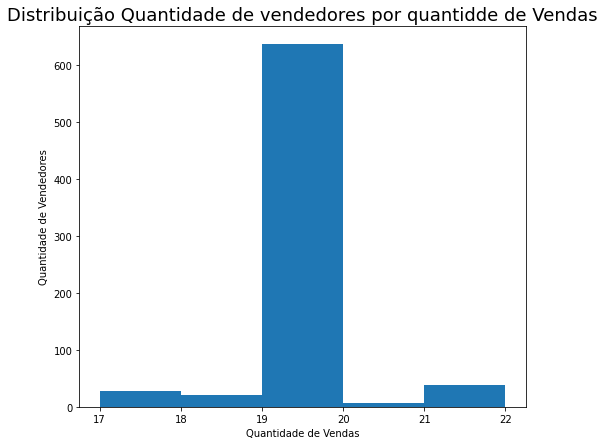

In [19]:
histograma_simples(df_vendedores_qtd,'qtd_vendas',17,23,passo=1,title='Distribuição Quantidade de vendedores por quantidde de Vendas',xlabel="Quantidade de Vendas",ylabel ='Quantidade de Vendedores',path='histograma_qtd_vendas_vendedores')

### **TOP 10 por quantidade de vendas**

In [20]:
df_vendedores_qtd.head(10)

,usuario,nome,total_compras,qtd_vendas,valor_medio_por_venda,percentual_tot_compras,percentual_qtd_vendas
0,295,ANDERSON,4853.08,22,220.59,0.26,0.16
1,6750,CLARA,2330.77,21,110.99,0.13,0.15
2,4456,SIMONE,1636.58,21,77.93,0.09,0.15
3,4464,MARIA,2673.82,21,127.32,0.15,0.15
4,4491,JESSICA,1702.13,21,81.05,0.09,0.15
5,4591,KELEN,1023.65,21,48.75,0.06,0.15
6,4775,ELLIDA,507.88,21,24.18,0.03,0.15
7,4863,TAINARA,3003.39,21,143.02,0.16,0.15
8,6085,MARCIANA,792.95,21,37.76,0.04,0.15
9,7245,SYANNE,1644.82,21,78.32,0.09,0.15


### **TOP 10 por valor total de vendas**

In [21]:
df_vendedores_qtd.sort_values(['total_compras'] ,ascending = [False]).reset_index(drop = True).head(10)

,usuario,nome,total_compras,qtd_vendas,valor_medio_por_venda,percentual_tot_compras,percentual_qtd_vendas
0,266970,BRUNO,28550.05,19,1502.63,1.56,0.14
1,321972,HELENO,26342.78,19,1386.46,1.44,0.14
2,234336,KAIO,25672.41,19,1351.18,1.40,0.14
3,211203,BRENDA,25402.70,19,1336.98,1.39,0.14
4,370,ROSILANE,24481.06,21,1165.76,1.34,0.15
5,316759,KAREN,23440.43,19,1233.71,1.28,0.14
6,326764,DAIANE,21025.40,19,1106.60,1.15,0.14
7,460,SANDRA,18042.31,21,859.16,0.98,0.15
8,219612,MARIA,17540.35,19,923.18,0.96,0.14
9,2391,VENDAS,16873.02,21,803.48,0.92,0.15


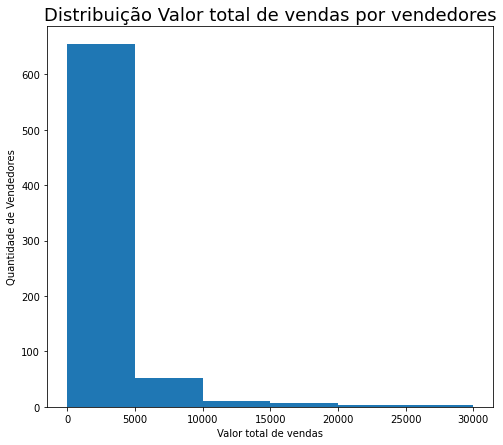

In [22]:
histograma_simples(df_vendedores_qtd,'total_compras',0,31000,passo=5000,title='Distribuição Valor total de vendas por vendedores',xlabel="Valor total de vendas",ylabel ='Quantidade de Vendedores',path='histograma_total_vendas_vendedores')

### **TOP 10 por valor medio por venda**

In [23]:
df_vendedores_qtd.sort_values(['valor_medio_por_venda'] ,ascending = [False]).reset_index(drop = True).head(10)

,usuario,nome,total_compras,qtd_vendas,valor_medio_por_venda,percentual_tot_compras,percentual_qtd_vendas
0,266970,BRUNO,28550.05,19,1502.63,1.56,0.14
1,321972,HELENO,26342.78,19,1386.46,1.44,0.14
2,234336,KAIO,25672.41,19,1351.18,1.40,0.14
3,211203,BRENDA,25402.70,19,1336.98,1.39,0.14
4,316759,KAREN,23440.43,19,1233.71,1.28,0.14
5,370,ROSILANE,24481.06,21,1165.76,1.34,0.15
6,326764,DAIANE,21025.40,19,1106.60,1.15,0.14
7,219612,MARIA,17540.35,19,923.18,0.96,0.14
8,83091,DEBORA,16759.46,19,882.08,0.91,0.14
9,56417,INGRA,16529.62,19,869.98,0.90,0.14


### **PRINTS**

In [24]:
#Informações do vendedor que mais vendeu
vendedor_mais_vendas = df_vendedores_qtd.iloc[0]['nome']
vendedor_mais_vendas_cod = df_vendedores_qtd.iloc[0]['usuario']
qtd_vendas_vendedor = df_vendedores_qtd.iloc[0]['qtd_vendas']

# Informações do vendedor com maior valor total de vendas
vendedor_maior_total = df_vendedores_qtd.sort_values(['total_compras'] ,ascending = [False]).reset_index(drop = True).iloc[0]['nome']
vendedor_maior_total_cod = df_vendedores_qtd.sort_values(['total_compras'] ,ascending = [False]).reset_index(drop = True).iloc[0]['usuario']
total_vendas_vendedor = df_vendedores_qtd.sort_values(['total_compras'] ,ascending = [False]).reset_index(drop = True).iloc[0]['total_compras'].round(2)

# Informações do vendedor com maior valor médio de vendas
vendedor_maior_media = df_vendedores_qtd.sort_values(['valor_medio_por_venda'] ,ascending = [False]).reset_index(drop = True).iloc[0]['nome']
vendedor_maior_media_cod = df_vendedores_qtd.sort_values(['valor_medio_por_venda'] ,ascending = [False]).reset_index(drop = True).iloc[0]['usuario']
media_vendas_vendedor = df_vendedores_qtd.sort_values(['valor_medio_por_venda'] ,ascending = [False]).reset_index(drop = True).iloc[0]['valor_medio_por_venda'].round(2)

# Informações Médias Gerais 
valor_medio_vendas_vendedor = (df_vendedores_qtd['total_compras'].sum()/df_vendedores_qtd['qtd_vendas'].count()).round(2)
valor_medio_vendas_por_venda = (df_vendedores_qtd['total_compras'].sum()/df_vendedores_qtd['qtd_vendas'].sum()).round(2)
qtd_media_vendas = int((df_vendedores_qtd['qtd_vendas'].sum()/df_vendedores_qtd['qtd_vendas'].count()).round(0))

print(f"Quantidade Média de Vendas por vendedor: {qtd_media_vendas} vendas")
print(f"Valor Médio Total por vendedor: R${valor_medio_vendas_vendedor}")
print(f"Valor Médio Total por venda: R${valor_medio_vendas_por_venda}")
print(f"Vendedor com mais vendas em todas as unidades: {vendedor_mais_vendas} - código do usário: {vendedor_mais_vendas_cod} - quantidade de vendas: {qtd_vendas_vendedor} -> {((qtd_vendas_vendedor/qtd_media_vendas)-1)*100:.2f}% acima da média")
print(f"Vendedor com maior total de vendas em todas as unidades: {vendedor_maior_total} - código do usário: {vendedor_maior_total_cod} - total de vendas: R${total_vendas_vendedor} -> {((total_vendas_vendedor/valor_medio_vendas_vendedor)-1)*100:.2f}% acima da média")
print(f"Vendedor com maior valor médio por venda em todas as unidades: {vendedor_maior_media} - código do usário: {vendedor_maior_media_cod} - valor médio de vendas: R${media_vendas_vendedor} -> {((media_vendas_vendedor/valor_medio_vendas_por_venda)-1)*100:.2f}% acima da média")



Quantidade Média de Vendas por vendedor: 19 vendas
Valor Médio Total por vendedor: R$2509.68
Valor Médio Total por venda: R$132.02
Vendedor com mais vendas em todas as unidades: ANDERSON - código do usário: 295 - quantidade de vendas: 22 -> 15.79% acima da média
Vendedor com maior total de vendas em todas as unidades: BRUNO - código do usário: 266970 - total de vendas: R$28550.05 -> 1037.60% acima da média
Vendedor com maior valor médio por venda em todas as unidades: BRUNO - código do usário: 266970 - valor médio de vendas: R$1502.63 -> 1038.18% acima da média


## 5.2 Quantidade de Vendas por Vendedores (POR UNIDADE)

In [25]:
#Criando a tabela que será utilizada para encontrar o vendedor que mais vendeu por filial
df_qtd_v_vendedores = df_vendedores.copy()
df_qtd_v_vendedores = df_qtd_v_vendedores.drop(['num_compra','cpf_na_nota',"tipo_de_mercadoria","data_compra"], axis = 'columns')
df_qtd_v_vendedores = df_qtd_v_vendedores.groupby(['filial','usuario','nome']).agg({'imposto':'count','valor_compra':'sum'}).reset_index(drop = False)
df_qtd_v_vendedores = df_qtd_v_vendedores.rename(columns={'imposto':'qtd_vendas'})
df_qtd_v_vendedores = df_qtd_v_vendedores.rename(columns={'valor_compra':'valor_total_vendas'})
df_qtd_v_vendedores = df_qtd_v_vendedores.sort_values(['qtd_vendas'] ,ascending = [False]).reset_index(drop = True)
df_qtd_v_vendedores


,filial,usuario,nome,qtd_vendas,valor_total_vendas
0,Loja Lábrea,366529,JOSE,15,1585.35
1,Loja Lábrea,216660,KEILA,15,730.70
2,Loja Lábrea,215046,VANDA,14,658.42
3,Loja Lábrea,214281,MICHELLE,14,1954.28
4,Loja Lábrea,213373,NEILA,14,452.61
...,...,...,...,...,...
2179,Loja Autazes,215046,VANDA,1,23.78
2180,Loja Autazes,216660,KEILA,1,23.59
2181,Loja Autazes,216977,AUTO,1,43.12
2182,Loja Autazes,52221,LUILMA,1,21.98


### **UTILIZANDO FUNÇÃO VP_FILIAL**

In [26]:
# Cria uma lista agrupada por filial
filiais = df_vendedores.groupby(['filial']).count().reset_index(drop = False).copy()
filiais = filiais['filial'].tolist()

# Transforma a tabela criada por agrupamento, em uma lista
list_qtd_v_vendedores = df_qtd_v_vendedores
list_qtd_v_vendedores = list_qtd_v_vendedores.values.tolist()


In [27]:
todas_filiais_v = vp_filial(filiais,list_qtd_v_vendedores,3)
# Separando em listas as filiais, qtd_vendas e os vendedores que mais venderam por filial
filiais_v = []
qtd_vendas_v = []
vendedor = []
cod_vendedor=[]
for idx, key in enumerate(todas_filiais_v):
  filiais_v.append(key)
  qtd_vendas_v.append(todas_filiais_v[key][0])
  vendedor.append(todas_filiais_v[key][1])
  cod_vendedor.append(todas_filiais_v[key][2])

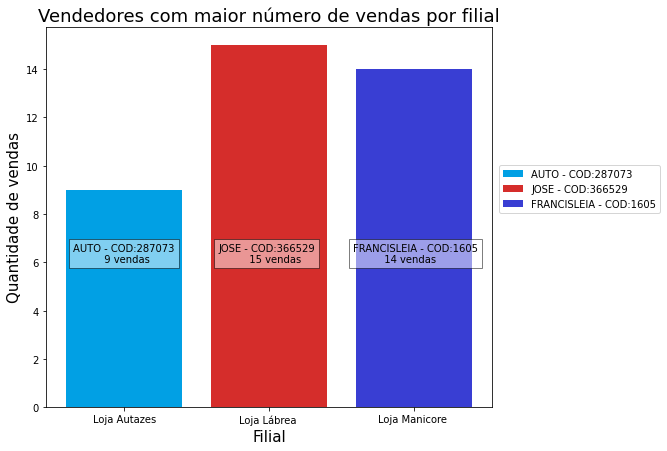

In [28]:
#cria a figura e o eixo
fig = plt.figure(figsize=(8,7))
ax1 = fig.add_subplot(111)

#colores
cores = [ '#01a0e4','#d52d2b','#393ed3', '#6075b7','#2a2b60','gray','pink','brown']

#plotando o gráfico
for n in range(len(vendedor)):
  ax1.bar(filiais_v[n],qtd_vendas_v[n], color = cores[n], label=f'{vendedor[n]} - COD:{cod_vendedor[n]}' )

# Adicionando legendas as barras
plt.xlabel('Filial', fontsize=15)
plt.ylabel('Quantidade de vendas', fontsize=15)

#legenda em posicao especifica
plt.legend(bbox_to_anchor=(1.20,0.5), loc="lower right", bbox_transform=fig.transFigure)

#Fonte dos eixos
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#Adicionando texto dentro do gráfico
for n in range(len(vendedor)):
  if n == len(vendedor)-1:
      plt.text(n-0.42, 6, f'{vendedor[n]} - COD:{cod_vendedor[n]}\n{" "*10}{qtd_vendas_v[n]} vendas', bbox=dict(facecolor='white', alpha=0.5))
  else:
     plt.text(n-0.35, 6, f'{vendedor[n]} - COD:{cod_vendedor[n]}\n{" "*10}{qtd_vendas_v[n]} vendas', bbox=dict(facecolor='white', alpha=0.5))

#Titulo
title = 'Vendedores com maior número de vendas por filial'
plt.title(title,fontsize=18)

plt.savefig('imagens/dados1/'+title +'.png')
plt.show()

In [29]:
todas_filiais_v = vp_filial(filiais,list_qtd_v_vendedores,4)
# Separando em listas as filiais, qtd_vendas e os vendedores que mais venderam por filial
filiais_v = []
qtd_vendas_v = []
vendedor = []
cod_vendedor=[]
for idx, key in enumerate(todas_filiais_v):
  filiais_v.append(key)
  qtd_vendas_v.append(todas_filiais_v[key][0])
  vendedor.append(todas_filiais_v[key][1])
  cod_vendedor.append(todas_filiais_v[key][2])

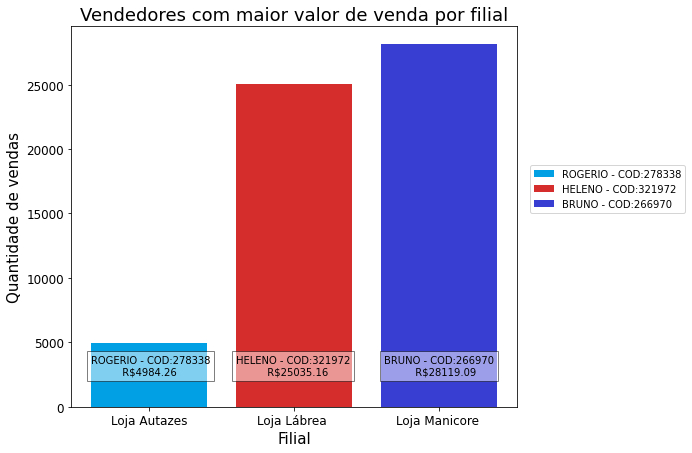

In [30]:
#cria a figura e o eixo
fig = plt.figure(figsize=(8,7))
ax1 = fig.add_subplot(111)

#colores
cores = [ '#01a0e4','#d52d2b','#393ed3', '#6075b7','#2a2b60','gray','pink','brown']

#plotando o gráfico
for n in range(len(vendedor)):
  ax1.bar(filiais_v[n],qtd_vendas_v[n], color = cores[n], label=f'{vendedor[n]} - COD:{cod_vendedor[n]}' )

# Adicionando legendas as barras
plt.xlabel('Filial', fontsize=15)
plt.ylabel('Quantidade de vendas', fontsize=15)

#legenda em posicao especifica
plt.legend(bbox_to_anchor=(1.20,0.5), loc="lower right", bbox_transform=fig.transFigure)

#Fonte dos eixos
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#Adicionando texto dentro do gráfico
for n in range(len(vendedor)):
  if n == len(vendedor)-1:
      plt.text(n-0.38, 2500, f'{vendedor[n]} - COD:{cod_vendedor[n]}\n{" "*10}R${qtd_vendas_v[n]:.2f}', bbox=dict(facecolor='white', alpha=0.5))
  else:
     plt.text(n-0.4, 2500, f'{vendedor[n]} - COD:{cod_vendedor[n]}\n{" "*10}R${qtd_vendas_v[n]:.2f}', bbox=dict(facecolor='white', alpha=0.5))

#Titulo
title = 'Vendedores com maior valor de venda por filial'
plt.title(title,fontsize=18)

plt.savefig('imagens/dados1/'+title +'.png')
plt.show()

## 5.3 Percentual (%) de CPF na nota fiscal 

### **% de CPF's em todas as Vendas**

In [31]:
df_cpf_nota = df_vendedores.groupby(['cpf_na_nota']).agg({'nome':'count' }).reset_index(drop = False).copy()
df_cpf_nota = df_cpf_nota = df_cpf_nota.rename(columns={'nome':'n_ocorrencias'})

df_cpf_nota['percentual'] = (df_cpf_nota['n_ocorrencias']/df_cpf_nota['n_ocorrencias'].sum()).round(4)*100
df_cpf_nota = df_cpf_nota.sort_values(['n_ocorrencias'] ,ascending = [False]).reset_index(drop = True)
df_cpf_nota


,cpf_na_nota,n_ocorrencias,percentual
0,SIM,11908,85.81
1,NAO,1969,14.19


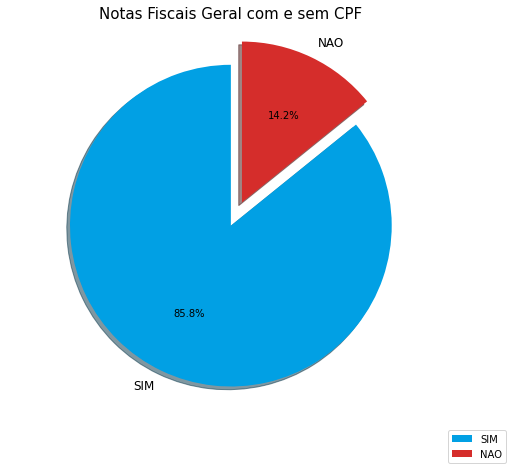

In [32]:
grafico_pizza(df_cpf_nota,'n_ocorrencias','cpf_na_nota',title="Notas Fiscais Geral com e sem CPF",x=1, explode=[0.09,0.07])

### **% de CPF's por Vendedor**

In [33]:
def definir_status_cpf(cpf,status):
  if (cpf == status):
    return 1
  else:
    return 0

In [34]:
df_cpf_vendedor = df_vendedores.copy()
df_cpf_vendedor['cpf_sim'] = df_cpf_vendedor.apply(lambda row: definir_status_cpf(row['cpf_na_nota'],'SIM'), axis = 'columns')
df_cpf_vendedor['cpf_nao'] = df_cpf_vendedor.apply(lambda row: definir_status_cpf(row['cpf_na_nota'],'NAO'), axis = 'columns')
df_cpf_vendedor = df_cpf_vendedor.groupby(['usuario','nome']).agg({'cpf_sim':'sum','cpf_nao':'sum'}).reset_index(drop = False)
df_cpf_vendedor['percentual_cpf_sim'] = (df_cpf_vendedor['cpf_sim'] *100 /(df_cpf_vendedor['cpf_sim'] + df_cpf_vendedor['cpf_nao'])).round(2)
df_cpf_vendedor = df_cpf_vendedor.sort_values(['cpf_sim'] ,ascending = [False]).reset_index(drop = True)
df_cpf_vendedor

,usuario,nome,cpf_sim,cpf_nao,percentual_cpf_sim
0,295,ANDERSON,20,2,90.91
1,370,ROSILANE,19,2,90.48
2,460,SANDRA,19,2,90.48
3,538,JAMERSON,19,2,90.48
4,606,JEANDERSON,19,2,90.48
...,...,...,...,...,...
725,107720,MARCIO,14,5,73.68
726,106031,KAREN,14,5,73.68
727,105835,RENATA,14,5,73.68
728,105106,KELY,14,5,73.68


In [35]:
df_cpf_vendedor.sort_values(['percentual_cpf_sim'] ,ascending = [False])

,usuario,nome,cpf_sim,cpf_nao,percentual_cpf_sim
26,333007,RAFAELA,18,1,94.74
20,406205,JESSICA,18,1,94.74
23,372733,ANDREZA,18,1,94.74
24,347514,SEBASTIANA,18,1,94.74
25,332561,BEATRIZ,18,1,94.74
...,...,...,...,...,...
681,126667,VERONICA,14,5,73.68
680,126656,PAULO,14,5,73.68
679,126637,PAULO,14,5,73.68
678,125079,LUCIANO,14,5,73.68


### **HISTOGRAMA - DISTRIBUIÇÃO DE PERCENTUAL DE CPF'S ACEITOS POR VENDEDOR**

[]

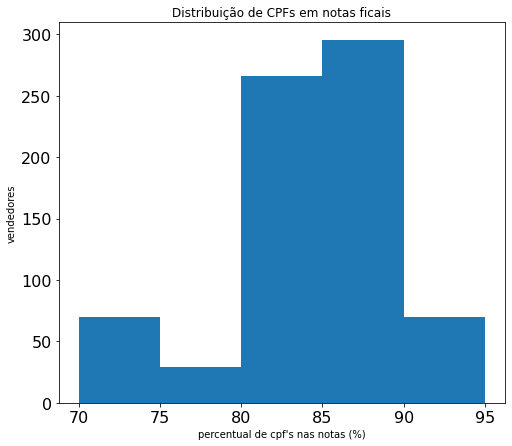

In [36]:
cpf_sim = df_cpf_vendedor['percentual_cpf_sim']
plt.figure(figsize=(8, 7))
plt.hist(cpf_sim, bins=range(70, 100,5))
plt.title('Distribuição de CPFs em notas ficais')
plt.xlabel("percentual de cpf's nas notas (%)")
plt.ylabel('vendedores')
plt.savefig('imagens/dados1/histograma-cpfs-positivos-vendedor.png')
plt.plot()

### ****% de CPF's por Filial****

In [37]:
df_cpf_filial = df_vendedores.copy()
df_cpf_filial['cpf_sim'] = df_cpf_filial.apply(lambda row: definir_status_cpf(row['cpf_na_nota'],'SIM'), axis = 'columns')
df_cpf_filial['cpf_nao'] = df_cpf_filial.apply(lambda row: definir_status_cpf(row['cpf_na_nota'],'NAO'), axis = 'columns')
df_cpf_filial = df_cpf_filial.groupby(['filial']).agg({'cpf_sim':'sum','cpf_nao':'sum'}).reset_index(drop = False)
df_cpf_filial['percentual_cpf_sim'] = (df_cpf_filial['cpf_sim'] *100 /(df_cpf_filial['cpf_sim'] + df_cpf_filial['cpf_nao'])).round(2)
df_cpf_filial['cpf_sim_relacao_total'] = (df_cpf_filial['cpf_sim'] *100 /(df_cpf_filial['cpf_sim'].sum())).round(2)
df_cpf_filial = df_cpf_filial.sort_values(['cpf_sim'] ,ascending = [True]).reset_index(drop = True)
df_cpf_filial

,filial,cpf_sim,cpf_nao,percentual_cpf_sim,cpf_sim_relacao_total
0,Loja Autazes,2506,207,92.37,21.04
1,Loja Manicore,4535,764,85.58,38.08
2,Loja Lábrea,4867,998,82.98,40.87


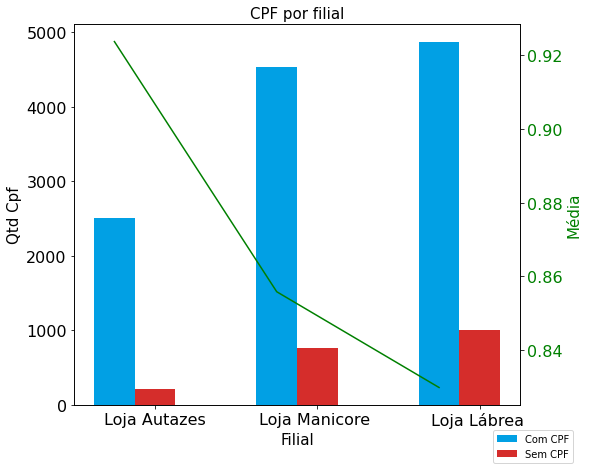

In [38]:
grafico_barras_empilhadas(df_cpf_filial, 'cpf_sim', 'cpf_nao', 'filial',legenda=['Com CPF','Sem CPF'],nome_eixo_x='Filial',nome_eixo_y='Qtd Cpf',title='CPF por filial')

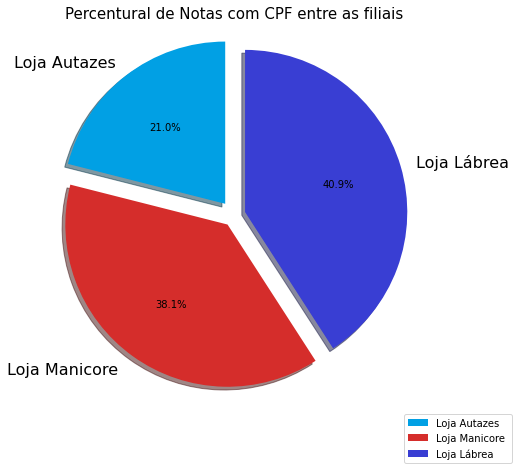

In [39]:
grafico_pizza(df_cpf_filial,'cpf_sim','filial',title="Percentural de Notas com CPF entre as filiais ",x=2, explode=[0.09,0.07,0.07])

## 5.4 Porcentagem de imposto sobre produto

In [40]:
df_imposto['por_imposto'] = (df_imposto['imposto']*100/df_imposto['valor_compra']).round(3)
df_imposto = df_imposto.sort_values(['por_imposto'] ,ascending = [False]).reset_index(drop = True)
df_imposto.head(5) # Note que a % de imposto é igual para todas as linhas tanto no inicio do Df 
df_imposto.tail(5) # quanto no fim do Df

,num_compra,usuario,nome,tipo_de_mercadoria,filial,data_compra,valor_compra,imposto,cpf_na_nota,por_imposto
13872,23703260,126667,VERONICA,HOME THEATER,Loja Lábrea,2019-06-09 18:06:57,24.180,1.08810,NAO,4.5
13873,25326486,128167,MARIA,"TV LED DE 55"" À 59""",Loja Lábrea,2019-01-14 11:46:56,3172.080,142.74360,NAO,4.5
13874,23359813,128882,AUTO,CIRCULADOR,Loja Lábrea,2019-06-02 13:05:38,56.564,2.54538,NAO,4.5
13875,23084470,129348,LUCIANO,BOLSAS,Loja Lábrea,2019-05-26 15:20:06,48.628,2.18826,NAO,4.5
13876,21881849,466595,REGINA,ANTIESPASMÓDICO REF,Loja Lábrea,2019-05-30 07:54:16,16.668,0.75006,SIM,4.5


### **Para comprovar por meio de cálculos executamos o código abaixo:**

In [41]:
media_imposto = df_imposto['por_imposto'].sum()/df_imposto['por_imposto'].count()
print(f'Média de Imposto de todas as vendas: {media_imposto}%')

Média de Imposto de todas as vendas: 4.5%


**Produtos com maiores impostos em valor absoluto:**
### Porém podemos encontrar o produto com maior valor absoluto de imposto.

In [42]:
maiores_impostos = df_imposto.sort_values(['imposto'] ,ascending = [False]).reset_index(drop = True).round(2)
maiores_impostos

,num_compra,usuario,nome,tipo_de_mercadoria,filial,data_compra,valor_compra,imposto,cpf_na_nota,por_imposto
0,21881257,234336,KAIO,SPLIT INV18001À30000,Loja Manicore,2019-01-04 16:17:04.000,24845.04,1118.03,SIM,4.5
1,21879719,211203,BRENDA,TV OLED / QLED,Loja Manicore,2019-06-14 16:35:42.000,24845.04,1118.03,SIM,4.5
2,25671866,266970,BRUNO,"TV LED DE 48"" À 54""",Loja Manicore,2019-01-20 19:10:36.000,24845.04,1118.03,SIM,4.5
3,21878723,321972,HELENO,SPLIT ACIMA DE 30000,Loja Lábrea,2020-04-20 11:45:20.855,24845.04,1118.03,NAO,4.5
4,21921597,316759,KAREN,TV OLED / QLED,Loja Manicore,2019-05-02 18:23:24.000,21006.96,945.31,SIM,4.5
...,...,...,...,...,...,...,...,...,...,...
13872,21881447,272476,RAQUEL,PRODUTOS DIVERSOS,Loja Lábrea,2019-05-03 20:44:08.000,0.48,0.02,SIM,4.5
13873,23804423,14607,MARIA,DILATADOR NASAL,Loja Autazes,2019-06-11 20:40:58.000,0.42,0.02,SIM,4.5
13874,23405173,39046,ZENILSON,BREGA&POPULAR,Loja Manicore,2019-06-03 20:18:04.000,0.37,0.02,SIM,4.5
13875,23957983,110442,JERONIMO,SANDUICHEIRA INDUSTR,Loja Manicore,2019-06-15 09:48:16.000,0.32,0.01,SIM,4.5


In [43]:
print(f'Valor do produto com maior imposto(valor absoluto): R${df_imposto["imposto"].max():.2f}')
print(f'Valor do produto com menor imposto(valor absoluto): R${df_imposto["imposto"].min():.2f}')

Valor do produto com maior imposto(valor absoluto): R$1118.03
Valor do produto com menor imposto(valor absoluto): R$0.01


## 5.5 Valor Máximo e Mínimo de Produtos com mesmo Nome

In [44]:
df_min = df_vendedores.copy()
df_max = df_vendedores.copy()
df_min = df_min.groupby(['tipo_de_mercadoria']).agg({'valor_compra':'min'}).reset_index(drop = False)
df_max = df_max.groupby(['tipo_de_mercadoria']).agg({'valor_compra':'max'}).reset_index(drop = False)

df_maxmin = pd.merge(df_min, df_max, on =['tipo_de_mercadoria'], how = 'left' ).copy()

df_max_min_prod = pd.merge(df_vendedores, df_min, on =['tipo_de_mercadoria'], how = 'left' )
df_max_min_prod = pd.merge(df_max_min_prod, df_max, on =['tipo_de_mercadoria'], how = 'left' )
df_max_min_prod = df_max_min_prod.rename(columns={'valor_compra_x':'valor_compra','valor_compra_y':'valor_min_compra','valor_compra':'valor_max_compra'})
df_max_min_prod['amplitude']=df_max_min_prod['valor_max_compra'] - df_max_min_prod['valor_min_compra']
df_max_min_prod = df_max_min_prod.sort_values(['amplitude'] ,ascending = [False])
df_max_min_prod

,num_compra,usuario,nome,tipo_de_mercadoria,filial,data_compra,valor_compra,imposto,cpf_na_nota,valor_min_compra,valor_max_compra,amplitude
5703,21921597,316759,KAREN,TV OLED / QLED,Loja Manicore,2019-05-02 18:23:24.000,21006.96,945.31,SIM,137.76,24845.04,24707.28
7417,24413157,33881,JERUZA,TV OLED / QLED,Loja Autazes,2019-06-25 13:22:23.000,137.76,6.20,SIM,137.76,24845.04,24707.28
500,23740303,263304,DEYMISON,TV OLED / QLED,Loja Manicore,2020-05-04 16:31:54.478,609.60,27.43,NAO,137.76,24845.04,24707.28
2192,23240420,6750,CLARA,TV OLED / QLED,Loja Lábrea,2019-05-30 16:32:20.000,1041.36,46.86,SIM,137.76,24845.04,24707.28
3049,24573873,69199,ALEXANDRE,TV OLED / QLED,Loja Lábrea,2019-06-28 18:36:09.000,1278.72,57.54,SIM,137.76,24845.04,24707.28
...,...,...,...,...,...,...,...,...,...,...,...,...
13499,21881095,177380,CRISTIANE,GELADEIRA 1,Loja Lábrea,2019-06-24 12:08:11.000,3.40,0.15,SIM,1.98,27.44,25.46
5534,25943858,243039,CLEIDIANE,GELADEIRA 1,Loja Manicore,2019-01-25 19:39:11.000,9.16,0.41,SIM,1.98,27.44,25.46
9099,24125184,161989,MARIA,GELADEIRA 1,Loja Lábrea,2019-06-18 20:31:03.000,13.13,0.59,SIM,1.98,27.44,25.46
12642,21879381,98056,LUCIANE,GELADEIRA 1,Loja Manicore,2019-06-26 18:49:36.000,9.34,0.42,NAO,1.98,27.44,25.46


In [45]:
df_maxmin = df_maxmin.rename(columns={'valor_compra_x':'valor_min_compra','valor_compra_y':'valor_max_compra'})
df_maxmin['amplitude']=df_maxmin['valor_max_compra'] - df_maxmin['valor_min_compra']
df_maxmin = df_maxmin.sort_values(['amplitude'] ,ascending = [False])
df_maxmin.reset_index(drop = True)

,tipo_de_mercadoria,valor_min_compra,valor_max_compra,amplitude
0,TV OLED / QLED,137.76,24845.04,24707.28
1,"TV LED DE 48"" À 54""",143.52,24845.04,24701.52
2,SPLIT ACIMA DE 30000,155.76,24845.04,24689.28
3,SPLIT INV18001À30000,197.28,24845.04,24647.76
4,AR COND SPLIT 2,302.16,17184.24,16882.08
...,...,...,...,...
852,HIDRATANTE INFANTIL,4.18,44.24,40.06
853,JOGO AMERICANO,7.81,47.31,39.50
854,PROTETOR SOLAR INFAN,9.55,48.26,38.71
855,FORNO 1,4.46,42.88,38.42


## 5.6 Produtos Mais Vendidos

In [46]:
df_produto =  df_vendedores.copy()
df_produto = df_produto.groupby(['tipo_de_mercadoria']).agg({'valor_compra':'sum','imposto':'count'}).reset_index(drop = False)
df_produto = df_produto.rename(columns={'imposto':'qtd_vendas'})
df_produto = df_produto.rename(columns={'valor_compra':'valor_total'})
df_produto['porcentagem_vendas_tot'] = (df_produto['qtd_vendas']*100/df_produto['qtd_vendas'].sum()).round(2)
df_produto = df_produto.sort_values(['qtd_vendas'] ,ascending = [False]).reset_index(drop = True)
df_produto

,tipo_de_mercadoria,valor_total,qtd_vendas,porcentagem_vendas_tot
0,SPLIT 18001 À 30000,155654.16,103,0.74
1,SPLIT 10001 À 18000,210643.92,103,0.74
2,TANQUINHO/SEMI-AUTOM,673.77,25,0.18
3,JANELA ATÉ 8500 BTUS,1064.27,25,0.18
4,JANELA 8501 À 10000,743.61,25,0.18
...,...,...,...,...
852,GEL ANTISSÉPTICO,460.90,11,0.08
853,UMIDIFICADOR,354.04,11,0.08
854,TOALHA UMEDECIDA,436.98,11,0.08
855,DUCHA GINECOLÓGICA,719.24,11,0.08


### **PRINTS**

In [47]:
def maior_produto(produtos):
  maiores = []
  maior_prod = {}
  for linha in produtos:
    if 'maior' in locals():
      if linha[2] > maior:
        maior = linha[2]
    else:
      maior = linha[2]
  # criando lista com os maiores valores    
  for linha in produtos:
    if linha[2] == maior:
      maiores.append(linha[0])
  maior_prod[maior] = maiores
  return maior_prod

In [48]:
maior_prod = maior_produto(df_produto.values.tolist())
for idx, key in enumerate(maior_prod) :
  print(f'Quantidade de Vendas dos produtos mais vendidos: {key} vendas')
  print('Produtos mais vendidos:', end=" ")
  for i in range(len(maior_prod[key])):
    if i < len(maior_prod[key]) -1:
      print(maior_prod[key][i], end=", ")
    else:
      print(maior_prod[key][i])


Quantidade de Vendas dos produtos mais vendidos: 103 vendas
Produtos mais vendidos: SPLIT 18001 À 30000, SPLIT 10001 À 18000


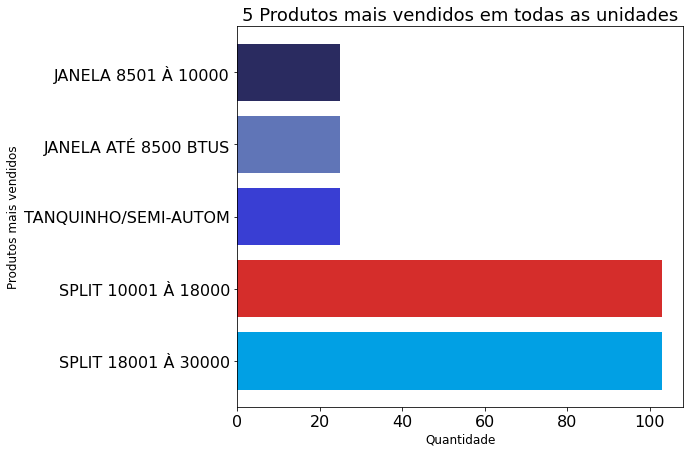

In [49]:
# Definindo os produtos, que vao para o eixo x:
produtos = df_produto['tipo_de_mercadoria'].head(5)
produtos = produtos.tolist()

# Definindo as participações que formarão o eixo y:
quantidade = df_produto['qtd_vendas'].head(5)
quantidade = quantidade.tolist()


#cria a figura e o eixo
fig = plt.figure(figsize=(8,7))
ax1 = fig.add_subplot(111)

#colores
cores = [ '#01a0e4','#d52d2b','#393ed3', '#6075b7','#2a2b60','gray','pink','brown']

#plotando o gráfico
ax1.barh(produtos,quantidade, color = cores)

# Adicionando legendas as barras
plt.xlabel('Quantidade', fontsize=12)
plt.ylabel('Produtos mais vendidos', fontsize=12)


#Fonte dos eixos
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#Titulo
title = '5 Produtos mais vendidos em todas as unidades'
plt.title(title,fontsize=18)

plt.savefig('imagens/dados1/'+title +'.png')
plt.show()

## 5.7 Produtos mais Vendidos por Vendedor

In [50]:
df_prod_vendedor = df_vendedores.copy()
df_prod_vendedor = df_prod_vendedor.drop(['num_compra','cpf_na_nota','imposto',"filial","data_compra"], axis = 'columns')
df_prod_vendedor = df_prod_vendedor.groupby(['usuario','nome','tipo_de_mercadoria']).agg({'valor_compra':'count'}).reset_index(drop = False)
df_prod_vendedor = df_prod_vendedor.rename(columns={'valor_compra':'qtd_vendas'})
df_prod_vendedor = df_prod_vendedor.sort_values(['qtd_vendas'] ,ascending = [False]).reset_index(drop = True)
df_prod_vendedor.head(10)


,usuario,nome,tipo_de_mercadoria,qtd_vendas
0,4464,MARIA,SPLIT 10001 À 18000,2
1,4491,JESSICA,SPLIT 18001 À 30000,2
2,322106,RELDSON,SPLIT 10001 À 18000,2
3,538,JAMERSON,SPLIT 10001 À 18000,2
4,606,JEANDERSON,SPLIT 18001 À 30000,2
5,322849,WELISON,SPLIT 18001 À 30000,2
6,256594,ADJANES,ACESSÓRIOS DE ÁUDIO,1
7,256982,TATIANA,PORTÁTIL INSTRUM,1
8,256982,TATIANA,CABECEIRAS,1
9,256982,TATIANA,CABOS,1


## 5.8 Produtos mais vendidos por Filial

In [71]:
df_prod_filial = df_vendedores.copy()
df_prod_filial = df_prod_filial.drop(['num_compra','cpf_na_nota','imposto',"usuario","nome","data_compra"], axis = 'columns')
df_prod_filial = df_prod_filial.groupby(['filial','tipo_de_mercadoria']).agg({'valor_compra':'count'}).reset_index(drop = False)
df_prod_filial = df_prod_filial.rename(columns={'valor_compra':'qtd_vendas'})
df_prod_filial = df_prod_filial.sort_values(['qtd_vendas'] ,ascending = [False]).reset_index(drop = True)
df_prod_filial2 = df_prod_filial.copy()
df_prod_filial

,filial,tipo_de_mercadoria,qtd_vendas
0,Loja Manicore,SPLIT 10001 À 18000,48
1,Loja Manicore,SPLIT 18001 À 30000,45
2,Loja Lábrea,SPLIT 18001 À 30000,34
3,Loja Lábrea,SPLIT 10001 À 18000,31
4,Loja Autazes,SPLIT 10001 À 18000,24
...,...,...,...
2551,Loja Autazes,BANDEJ/TRAVES/BAIXEL,1
2552,Loja Manicore,SABONETE/GEL P/BANHO,1
2553,Loja Autazes,BATEDEIRA,1
2554,Loja Autazes,COMPUTADORES,1


In [52]:
filiais = df_vendedores.groupby(['filial']).count().reset_index(drop = False).copy()
filiais = filiais['filial'].tolist()

df_prod_filial = df_prod_filial.values.tolist()
list_produto_filial = []
todas_filiais = {}
for filial in filiais:
  for linha in df_prod_filial:
    if linha[0] == filial:
      if 'maior' in locals():
        if linha[2] > maior:
          maior = linha[2]
          produto = linha[1]
      else:
        maior = linha[2]
        produto = linha[1]
  todas_filiais[filial] = [maior,produto]
  maior = 0
# Separando em listas as filiais, qtd_vendas e os produtos mais vendidos por filial
filiais = []
qtd_vendas = []
produto = []
for idx, key in enumerate(todas_filiais):
  filiais.append(key)
  qtd_vendas.append(todas_filiais[key][0])
  produto.append(todas_filiais[key][1])

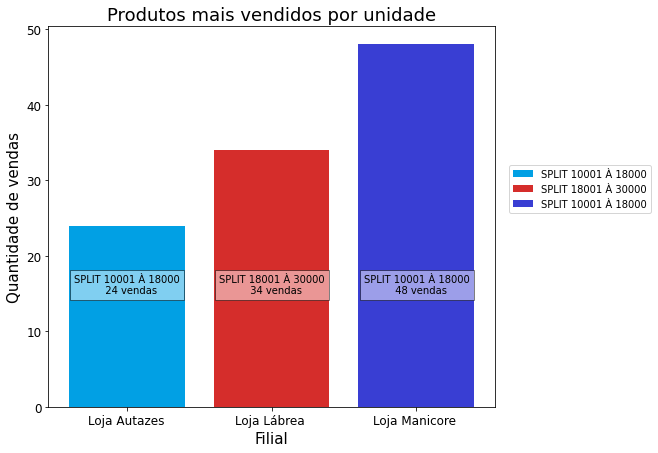

In [53]:
# Definindo os produtos, que vao para o eixo x:
produtos = filiais

# Definindo as participações que formarão o eixo y:
quantidade = qtd_vendas

#cria a figura e o eixo
fig = plt.figure(figsize=(8,7))
ax1 = fig.add_subplot(111)

#colores
cores = [ '#01a0e4','#d52d2b','#393ed3', '#6075b7','#2a2b60','gray','pink','brown']

#plotando o gráfico
for n in range(len(produtos)):
  ax1.bar(produtos[n],quantidade[n], color = cores[n], label=produto[n] )

# Adicionando legendas as barras
plt.xlabel('Filial', fontsize=15)
plt.ylabel('Quantidade de vendas', fontsize=15)

#legenda em posicao especifica
plt.legend(bbox_to_anchor=(1.18,0.5), loc="lower right", bbox_transform=fig.transFigure)

#Fonte dos eixos
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#Adicionando texto dentro do gráfico
for n in range(len(produto)):
  plt.text(n-0.36, 15, f'{produto[n]}\n{" "*10}{quantidade[n]} vendas', bbox=dict(facecolor='white', alpha=0.5))

#Titulo
title = 'Produtos mais vendidos por unidade'
plt.title(title,fontsize=18)

plt.savefig('imagens/dados1/'+title +'.png')
plt.show()

# **6.0 EXTRAINDO INFORMAÇÕES BASE 2**

# 6.1 Porcentagem de Imposto por Compra

In [54]:
df_pip = df_lojas.drop(['cod_loja',"inicio","termino","data_compra","cod_produto"], axis = 'columns').copy()
df_pip['porcent_imp'] = ((df_pip['impostos']/df_pip['quantidade'])*100/(df_pip['valor_unitario_sem_impo'] + (df_pip['impostos']/df_pip['quantidade']))).round(2)
df_pip.head(5) # Note que mais uma vez o imposto é constante para todos os produtos
df_pip.tail(3) # Logo não haveria necessidade de calcular um imposto geral ou por tipo de produto, sempre será 11,15%
df_pip['total_sem_imposto'] = df_pip['valor_unitario_sem_impo']*df_pip['quantidade']
df_pip.head(3)

,loja,produto,valor_unitario_sem_impo,quantidade,valor_total,impostos,cash_back_instantaneo,porcent_imp,total_sem_imposto
0,Unidade Manaus 1,Smart Pro,3000,1,3331.29,376.29,45.0,11.15,3000
1,Unidade Manaus 1,Smart Pro,3000,1,3331.29,376.29,45.0,11.15,3000
2,Unidade Manaus 1,Smart Pro,3000,1,3331.29,376.29,45.0,11.15,3000


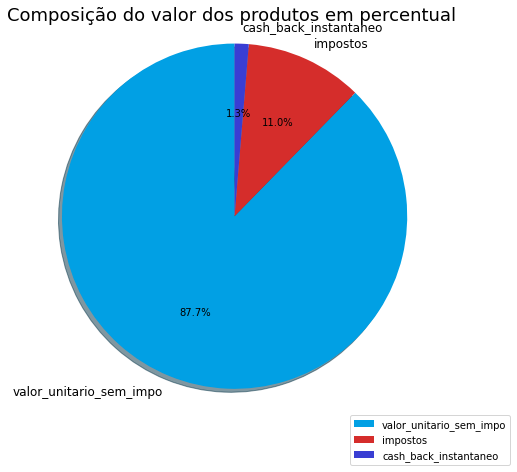

In [55]:
valor_total = df_pip['total_sem_imposto'].sum() 
impostos = df_pip['impostos'].sum().copy()
cash_back_instantaneo = df_pip['cash_back_instantaneo'].sum().copy()
ocorrencia = [valor_total,impostos,cash_back_instantaneo]
labels = []
# Adquirindo nome das coluns da tabela anterior
for n in range(len(df_pip.columns)):
  if n == 2 or n == 5 or n == 6:
      labels.append(df_pip.columns[n])
# Arrumando os nomes:



title= "Composição do valor dos produtos em percentual "

fig = plt.figure(figsize=(8,7))
ax1 = fig.add_subplot(111)
   
cores = [ '#01a0e4','#d52d2b','#393ed3', 'yellow','black','gray','pink','brown']

plt.pie(ocorrencia, explode=[0,0,0], labels=labels, colors=cores, autopct='%1.1f%%', shadow=True, startangle=90)

# Com essa opção o gráfico ficará em círculo
plt.axis('equal') 

# Cria um título para o gráfico
ax1.set_title(title, fontsize=18) 

#legenda em posicao especifica
ax1.legend(bbox_to_anchor=(1,0), loc="lower right", bbox_transform=fig.transFigure)

#Fonte dos eixos
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
#plt.rcParams['legend.fontsize'] = 12

# Salvar grafico como imagem
plt.savefig('imagens/dados2/'+title +'.png')

#Monstra o gráfico
plt.show()

# 6.2 Unidade que mais vendeu

In [56]:
df_pip2 = df_pip.groupby(['loja']).agg({'total_sem_imposto':'sum','impostos':'sum','cash_back_instantaneo':'sum','quantidade':'sum'}).copy()
df_pip2 = df_pip2.sort_values(['total_sem_imposto'] ,ascending = [False]).reset_index(drop = False).round(2).copy()
df_pip2['valor_final'] = df_pip2['total_sem_imposto'] + df_pip2['impostos'] - df_pip2['cash_back_instantaneo']
df_pip2

,loja,total_sem_imposto,impostos,cash_back_instantaneo,quantidade,valor_final
0,Unidade Manaus 1,1513750,189869.66,22706.25,679,1680913.41
1,Unidade Manaus 3,1456500,182688.80,21847.50,594,1617341.30


In [57]:
def grafico_barras(df, coluna1, coluna2,coluna3,coluna4, nome_dados, legenda=[1,2],nome_eixo_x='eixo x',nome_eixo_y='eixo y',title='titulo'):
  x1 = []
  x2 = []
  x3 = []
  x4 = []
  x5 = []
  a = []
  for i in df.index: 
      if i > 5:
        break
      else:
        #cria os dados
        x1.append(df[coluna1][i])
        x2.append(df[coluna2][i])
        x4.append(df[coluna3][i])
        x3.append(df[nome_dados][i])
        x5.append(df[coluna4][i])
        a.append(df[coluna1][i]/(df[coluna1][i] + df[coluna2][i]) )

  #Define a Largura das barras
  barWidth = 0.25
      
  #cria a figura e o eixo
  fig = plt.figure(figsize=(8,7))
  ax1 = fig.add_subplot(111)

  #Definindo a posição das barras
  r1 = np.arange(len(x1))
  r2 = [x + barWidth for x in r1]
  r3 = [x + barWidth for x in r2]

  #Criando as barras
  plt.bar(r1, x1, color='#01a0e4', width=barWidth, label= legenda[0])
  plt.bar(r2, x2, color='#d52d2b', width=barWidth, label=legenda[1])
  plt.bar(r3, x4, color='#393ed3', width=barWidth, label=legenda[2])


  # Adicionando legendas as barras
  plt.xlabel(nome_eixo_x, fontsize=15)
  plt.xticks([r + barWidth for r in range(len(x1))],x3)
  plt.ylabel(nome_eixo_y, fontsize=15)
  plt.title(title,fontsize=15)

  #legenda em posicao especifica
  ax1.legend(bbox_to_anchor=(1.18,0.5), loc="lower right", bbox_transform=fig.transFigure)

  #Fonte dos eixos
  plt.rcParams['xtick.labelsize'] = 16
  plt.rcParams['ytick.labelsize'] = 16
  #plt.rcParams['legend.fontsize'] = 16

  #Adicionando texto dentro do gráfico
  for n in range(len(x3)):
    plt.text(n+0.15, 1300000, f'{legenda[0]}:\n{" "*5}R${x1[n]:.2f}\n{" "*5}{x5[n]} vendas', bbox=dict(facecolor='white', alpha=0.5))
    plt.text(n+0.1, 300000, f'{legenda[1]}:\n{" "*5}R${x2[n]:.2f}', bbox=dict(facecolor='white', alpha=0.5))
    plt.text(n+0.4, 100000, f'{legenda[2]}:\n{" "*5}R${x4[n]:.2f}', bbox=dict(facecolor='white', alpha=0.5))

  # Salvar grafico como imagem
  plt.savefig('imagens/dados2/'+title +'.png')

  plt.show()

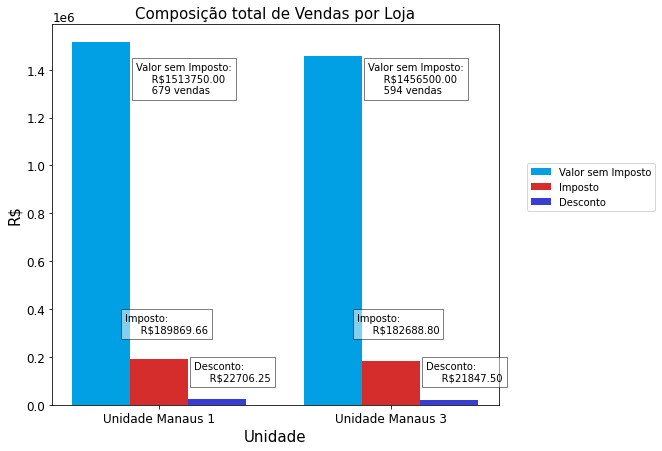

In [58]:
grafico_barras(df_pip2, 'total_sem_imposto', 'impostos','cash_back_instantaneo','quantidade', 'loja',legenda=['Valor sem Imposto','Imposto','Desconto'],nome_eixo_x='Unidade',nome_eixo_y='R$',title='Composição total de Vendas por Loja')

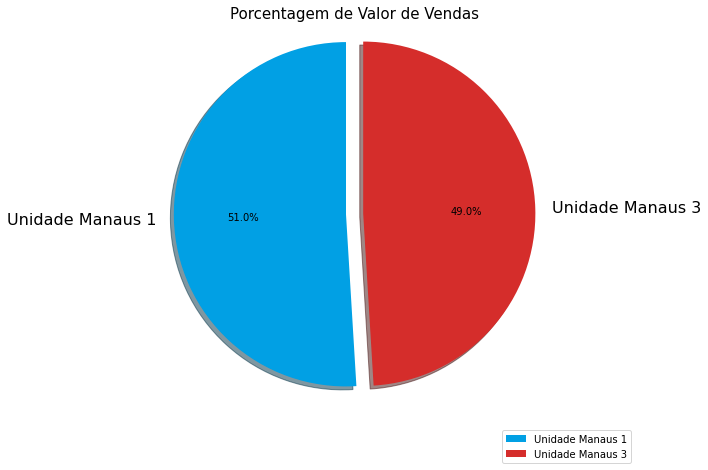

In [59]:
grafico_pizza(df_pip2,'valor_final','loja',title="Porcentagem de Valor de Vendas",x=1, explode=[0,0.1],diretorio='dados2')

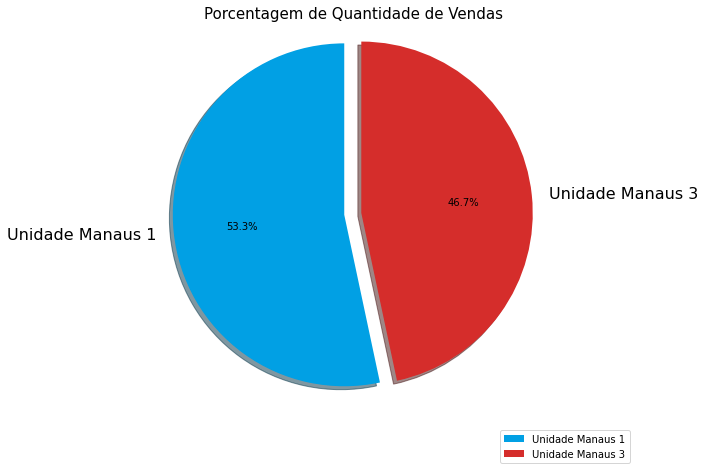

In [60]:
grafico_pizza(df_pip2,'quantidade','loja',title="Porcentagem de Quantidade de Vendas",x=1, explode=[0,0.1],diretorio='dados2')

# 6.3 Produto Mais Vendido


In [61]:
df_pip3 = df_pip.groupby(['loja','produto']).agg({'quantidade':'sum'}).copy()
df_pip3 = df_pip3.reset_index(drop=False)
df_pip3

,loja,produto,quantidade
0,Unidade Manaus 1,Smart Med,299
1,Unidade Manaus 1,Smart Pro,380
2,Unidade Manaus 3,Smart Med,186
3,Unidade Manaus 3,Smart Pro,408


In [62]:
def inserir_col(produto,coluna):
  if produto == coluna:
    return 1
  else:
    return 0
df_pip3['smart_med'] = df_pip3.apply(lambda row: inserir_col(row['produto'],"Smart Med"), axis = 'columns').copy()
df_pip3['smart_pro'] = df_pip3.apply(lambda row: inserir_col(row['produto'],"Smart Pro"), axis = 'columns').copy()

In [63]:

df_pip3['smart_med'] = df_pip3['smart_med']*df_pip3['quantidade']
df_pip3['smart_pro'] = df_pip3['smart_pro']*df_pip3['quantidade']
df_pip3 = df_pip3.drop(['produto','quantidade'], axis = 'columns').copy()
df_prod1 = df_pip3.groupby(['loja']).agg({'smart_med':'sum'}).copy()
df_prod2 = df_pip3.groupby(['loja']).agg({'smart_pro':'sum'}).copy()
df_prod12 = pd.merge(df_prod1, df_prod2, on =['loja'], how = 'left' ).reset_index(drop=False)
df_prod12

,loja,smart_med,smart_pro
0,Unidade Manaus 1,299,380
1,Unidade Manaus 3,186,408


In [64]:
def grafico_barras2(df, coluna1, coluna2,nome_dados, legenda=[1,2],nome_eixo_x='eixo x',nome_eixo_y='eixo y',title='titulo'):

  x1 = []
  x2 = []
  x3 = []

  for i in df.index: 
      if i > 5:
        break
      else:
        #cria os dados
        x1.append(df[coluna1][i])
        x2.append(df[coluna2][i])
        x3.append(df[nome_dados][i])
  
  #Define a Largura das barras
  barWidth = 0.25
      
  #cria a figura e o eixo
  fig = plt.figure(figsize=(8,7))
  ax1 = fig.add_subplot(111)

  #Definindo a posição das barras
  r1 = np.arange(len(x1))
  r2 = [x + barWidth for x in r1]
 

  #Criando as barras
  plt.bar(r1, x1, color='#01a0e4', width=barWidth, label= legenda[0])
  plt.bar(r2, x2, color='#d52d2b', width=barWidth, label=legenda[1])



  # Adicionando legendas as barras
  plt.xlabel(nome_eixo_x, fontsize=15)
  plt.xticks([r + barWidth for r in range(len(x1))],x3)
  plt.ylabel(nome_eixo_y, fontsize=15)
  plt.title(title,fontsize=15)

  #legenda em posicao especifica
  ax1.legend(bbox_to_anchor=(1.1,0.5), loc="lower right", bbox_transform=fig.transFigure)

  #Fonte dos eixos
  plt.rcParams['xtick.labelsize'] = 16
  plt.rcParams['ytick.labelsize'] = 16
  #plt.rcParams['legend.fontsize'] = 16

  #Adicionando texto dentro do gráfico
  for n in range(len(x3)):
    plt.text(n-0.15, 100, f'{legenda[0]}:\n{" "*5}{x1[n]} vendas', bbox=dict(facecolor='white', alpha=0.5))
    plt.text(n+0.12, 250, f'{legenda[1]}:\n{" "*5}{x2[n]} vendas', bbox=dict(facecolor='white', alpha=0.5))
  plt.text(n-0.4, 350, f'Smart Pro: {x2[0]+x2[1]} vendas\nSmart Med: {x1[0]+x1[1]} vendas', bbox=dict(facecolor='white', alpha=0.5))

  # Salvar grafico como imagem
  plt.savefig('imagens/dados2/'+title +'.png')

  plt.show()

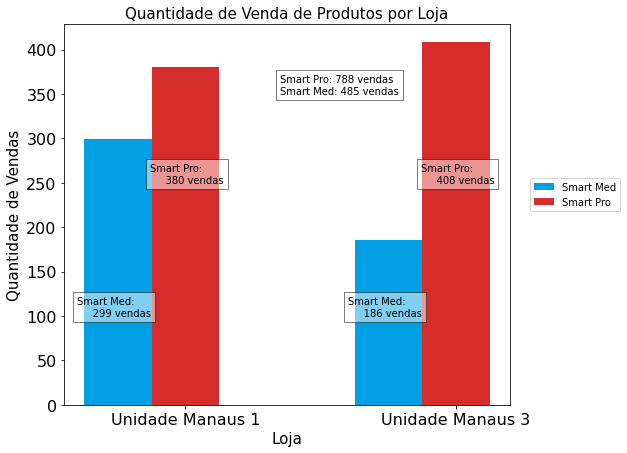

In [65]:
grafico_barras2(df_prod12, 'smart_med', 'smart_pro', 'loja',legenda =['Smart Med','Smart Pro'],nome_eixo_x='Loja',nome_eixo_y='Quantidade de Vendas',title='Quantidade de Venda de Produtos por Loja')


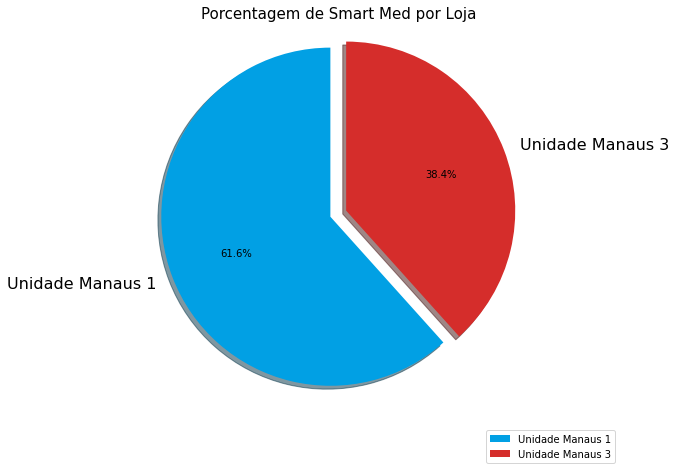

In [66]:
grafico_pizza(df_prod12,'smart_med','loja',title="Porcentagem de Smart Med por Loja",x=1, explode=[0,0.1],diretorio='dados2')

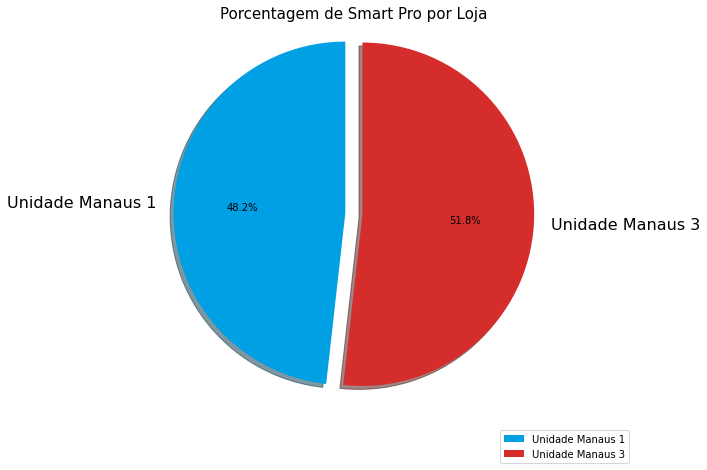

In [67]:
grafico_pizza(df_prod12,'smart_pro','loja',title="Porcentagem de Smart Pro por Loja",x=1, explode=[0,0.1],diretorio='dados2')

In [68]:
df_produto_m_vendido = df_pip.groupby(['produto']).agg({'quantidade':'sum'}).reset_index(drop=False).copy()
df_produto_m_vendido

,produto,quantidade
0,Smart Med,485
1,Smart Pro,788


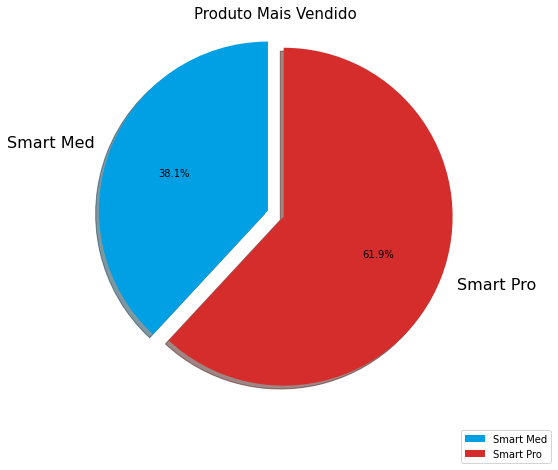

In [69]:
grafico_pizza(df_produto_m_vendido,'quantidade','produto',title="Produto Mais Vendido",x=1, explode=[0,0.1],diretorio='dados2')

In [72]:
writer = pd.ExcelWriter('relatorio_base1.xlsx')
df_vendedores_qtd.to_excel(writer, 'vendedor_mais_vendas(geral)', index = False)
df_qtd_v_vendedores.to_excel(writer, 'vendedor_mais_vendas(unidade)', index = False)
df_cpf_vendedor.to_excel(writer, 'qtd_cpfs_por_vendedor', index = False)
df_cpf_filial.to_excel(writer, 'qtd_cpfs_por_filial', index = False)
df_imposto.to_excel(writer, 'imposto_por_produto', index = False)
maiores_impostos.to_excel(writer, 'maiores_impostos_valor_abs', index = False)
df_maxmin.to_excel(writer, 'valor_max_min_mesmo_produto', index = False)
df_produto.to_excel(writer, 'produtos_mais_vendidos', index = False)
df_prod_filial2.to_excel(writer, 'produtos_mais_vendidos(filial)', index = False)
writer.save()


In [74]:
writer = pd.ExcelWriter('relatorio_base2.xlsx')
df_pip.to_excel(writer, 'porcentagem_imposto_por_compra', index = False)
df_pip2.to_excel(writer, 'unidade_que_mais_vendeu', index = False)
df_prod12.to_excel(writer, 'produto_mais_vendido(unidade)', index = False)
writer.save()
